In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [91]:
pip install mkl numpy seaborn

Note: you may need to restart the kernel to use updated packages.


# Clase 2

## Biblioteca Pandas

Pandas es una biblioteca de Python muy usada para análisis y manipulación de datos. Provee principalmente dos tipos de clases para trabajar con datos:

- **Series:** un vector unidimensional indexado, que contiene datos de cualquier tipo
como números enteros, cadenas, objetos Python, etc.

- **DataFrame:** una estructura de datos bidimensional que contiene datos como una matriz bidimensional o una tabla con filas y columnas.

Bibliografía recomendada: Sección 5 de Python for Data Analysis, de Wes McKinney (creador de la biblioteca Pandas), disponible on-line en forma gratuita en la página
https://wesmckinney.com/book/pandas-basics

Para recordar =

    . si hay ** ** = **negrita**
    
    . si hay _ = _cursiva_

### Series

Las series de Pandas son vectores similares a los arrays de NumPy, que podemos indexar usando etiquetas.

Crear la siguiente Series, observar qué devuelve `values` e `index` e interpretar.

In [3]:
import pandas as pd
enteros = pd.Series([7,4,-5,3])
enteros

0    7
1    4
2   -5
3    3
dtype: int64

In [ ]:
enteros.values

array([ 7,  4, -5,  3])

.values me da los valores en la serie

In [5]:
enteros.index # Por default , los indices van de 0 a N-1.

RangeIndex(start=0, stop=4, step=1)

.index nos dice de sobre el rango de la iteracion = donde comienzo, donde termina y de cuanto en cuanto va iterando

Podemos asignar etiquetas (o índices) a cada valor de la serie.

In [6]:
reales = pd.Series([np.pi,0,-2,1.41], index = ["a", "b", "c", "d"])
display(reales)

a    3.141593
b    0.000000
c   -2.000000
d    1.410000
dtype: float64

reales tiene una lista numpy + una lista de indices, q les llamamos "etiquetas". Cuando le doy "display" me hace un print de aquello que esta en la variable reales 

In [7]:
reales.loc["a":"b"]

a    3.141593
b    0.000000
dtype: float64

In [8]:
reales.loc[["a","b"]]

a    3.141593
b    0.000000
dtype: float64

In [9]:
display(reales.values)
display(reales.index)

array([ 3.14159265,  0.        , -2.        ,  1.41      ])

Index(['a', 'b', 'c', 'd'], dtype='object')

Para acceder a los elementos podemos usar las etiquetas.

In [10]:
print(reales["a"])

3.141592653589793


In [11]:
# Acceder por su posición no está recomendado. 
reales[1]

/tmp/ipykernel_2363/2037761590.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  reales[1]


np.float64(0.0)

reales[1] me da el valor de esa posicion, pero esta manera no es correcta

In [12]:
# Para acceder por su posición usamos iloc
reales.iloc[1]

np.float64(0.0)

la manera correcta es usando "iloc[ ]", me deja acceder usando las posiciones.

In [ ]:
# Podemos usar también rangos
reales.iloc[1:3]

b    0.0
c   -2.0
dtype: float64

Para escribir los rangos se escribe rango = [:]

In [14]:
# Para acceder por etiquetas podemos usar también loc
reales.loc["a"]

np.float64(3.141592653589793)

.loc[ ] me deja acceder usando la etiquetas

Si quiero escribir una variable y debinirle etiquetas numericas, escribo un "range".

In [15]:
# Podemos definir labels numericos
temperaturas = pd.Series([15, 17, 18.2, 25], index = range(10,14))
print(temperaturas)

10    15.0
11    17.0
12    18.2
13    25.0
dtype: float64


In [16]:
# Que esperamos de los siguientes comandos?
print(temperaturas.iloc[1:3])
print(temperaturas.loc[10])

11    17.0
12    18.2
dtype: float64
15.0


In [17]:
# Funcionará?
#temperaturas.iloc[10] no funciona ya que yo estoy intentando acceder a la posicion 10 y esa no existe. 10 en este caso es una etiqueta.

In [18]:
# Podemos seleccionar elementos mediante una lista de etiquetas
realesSub = reales[["a","b"]]
print(realesSub)
print(realesSub.index)

a    3.141593
b    0.000000
dtype: float64
Index(['a', 'b'], dtype='object')


## Operaciones con series
Las operaciones que pueden aplicarse a numpy arrays pueden aplicarse también a series de Pandas, conservando los índices.

In [19]:
np.exp(reales)

a    23.140693
b     1.000000
c     0.135335
d     4.095955
dtype: float64

.exp() es para hacer la exponencial

In [20]:
reales * 3

a    9.424778
b    0.000000
c   -6.000000
d    4.230000
dtype: float64

In [21]:
reales > 1

a     True
b    False
c    False
d     True
dtype: bool

In [22]:
reales[reales > 1]

a    3.141593
d    1.410000
dtype: float64

¿Qué esperamos que dé este código?

In [23]:
print(enteros)
print(reales)

0    7
1    4
2   -5
3    3
dtype: int64
a    3.141593
b    0.000000
c   -2.000000
d    1.410000
dtype: float64


In [24]:
#enteros = pd.Series([7,4,-5,3])
#reales = pd.Series([np.pi,0,-2,1.41], index = ["a", "b", "c", "d"])
enteros + reales

0   NaN
1   NaN
2   NaN
3   NaN
a   NaN
b   NaN
c   NaN
d   NaN
dtype: float64

Como las etiquetas no son las mismas aunque intente sumarlas no me va a dar un resultado.

NaN significa "not a number", se utiliza en series de Pandas para valores faltantes (missing values).

In [25]:
# Y ahora? Defino etiquetas para enteros
enteros2 = pd.Series([1,2,3,4], index = ["d", "b", "y", "z"])
#reales = pd.Series([np.pi,0,-2,1.41], index = ["a", "b", "c", "d"])
reales + enteros2

a     NaN
b    2.00
c     NaN
d    2.41
y     NaN
z     NaN
dtype: float64

Vemos que solo se suman las filas con índices iguales.

Es decir, busca en las listas donde las etiquetas sean iguales y saca esos valores correspodientes y opera con ellos. No me importa q la posicion no sea la misma para ambos.

Las series de Pandas tienen varias funciones útiles que iremos viendo más adelante. A modo de ejemplo, interpretar que hacen las siguientes funciones.

In [26]:
series1 = pd.Series(["a", "b", "c", "b", "a", "c", "x"])
series1.isin(["b", "c"])

0    False
1     True
2     True
3     True
4    False
5     True
6    False
dtype: bool

.isin([]) es "is in", es la funcion pertenece de Pandas.

In [27]:
# Pregunta: cómo me quedo solo con las filas con letras "b" o "c"?

In [28]:
series1[series1.isin(["b", "c"])]
#quiero acceder a la lista de series1 y solo ver los True del isin

1    b
2    c
3    b
5    c
dtype: object

In [29]:
series1.value_counts()

a    2
b    2
c    2
x    1
Name: count, dtype: int64

funcion contador!

### DataFrames
Un data frame es una representación de los datos en formato de tabla en la que cada
columna son vectores del mismo tamaño. Como cada columna es un vector, cada columna puede
contener datos de un único tipo. Se pueden pensar como variables. Cada variable corresponde a una
serie de Pandas, y **todas las series de un dataframe están indexadas por los mismos índices**.

Una forma de crear un data frame es utilizando un "diccionario". Todas las variables del
diccionario deben ser vectores o listas de la misma longitud. 

In [30]:
data = {"nombres": ["Rodrigo", "Sergio", "Cristina", "Diana"], "altura": np.array([178, 172, 175, 168]), "peso": np.array
([81.2, 76.1, 68.5, 64.0])}
display(data)

{'nombres': ['Rodrigo', 'Sergio', 'Cristina', 'Diana'],
 'altura': array([178, 172, 175, 168]),
 'peso': array([81.2, 76.1, 68.5, 64. ])}

In [31]:
type(data)

dict

In [32]:
data["altura"]

array([178, 172, 175, 168])

In [33]:
# Creamos un data frame con esos datos. Cuáles son los índices?. Se creen solos las etiquetas numericas.
pacientes = pd.DataFrame(data)
display(pacientes)

,nombres,altura,peso
0,Rodrigo,178,81.2
1,Sergio,172,76.1
2,Cristina,175,68.5
3,Diana,168,64.0


In [34]:
# En este ejemplo podemos usar los nombres como índices y los nombres se vuelven las etiquetas.
pacientes = pd.DataFrame(data).set_index("nombres")
display(pacientes)

,altura,peso
nombres,,
Rodrigo,178,81.2
Sergio,172,76.1
Cristina,175,68.5
Diana,168,64.0


In [35]:
# Podemos acceder a las columnas de dos formas distintas
#Forma 1
alturas = pacientes["altura"]
alturas

nombres
Rodrigo     178
Sergio      172
Cristina    175
Diana       168
Name: altura, dtype: int64

In [36]:
#Forma 2
pacientes.altura

nombres
Rodrigo     178
Sergio      172
Cristina    175
Diana       168
Name: altura, dtype: int64

In [37]:
type(alturas)

pandas.core.series.Series

A diferencia de las matrices en Numpy, un DataFrame de Pandas es un conjunto de columnas, no de filas. 
Si queremos saber la altura de Rodrigo, pensar cuál de los dos comandos será correcto antes de ejecutarlos.

In [38]:
#pacientes["Rodrigo"].altura == forma incorrecta
pacientes["altura"].Rodrigo

np.int64(178)

Para acceder a una fila de un dataframe, podemos usar los métodos `loc[]` y `iloc[]`. 

¿Cómo se usan? ¿Cuál es la diferencia entre los dos comandos? ¿Que tipo de dato nos devuelve?

In [39]:
pacientes.loc["Rodrigo"]

altura    178.0
peso       81.2
Name: Rodrigo, dtype: float64

In [40]:
pacientes.iloc[1]

altura    172.0
peso       76.1
Name: Sergio, dtype: float64

In [41]:
pacientes.loc["Rodrigo"].values

array([178. ,  81.2])

## Gapminder

A modo de ejemplo, vamos a explorar el dataset Gapminder que contiene datos poblacionales y de desarrollo humano de distintos países a lo largo del tiempo.

Si gapminder no está instalado, ejecutrar el siguiente comando para instalarlo

In [110]:
pip install gapminder

Note: you may need to restart the kernel to use updated packages.


In [111]:
from gapminder import gapminder
display(gapminder)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [44]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


.head() devuelve las primeras 5 filas.

Podemos ver información básica del DataFrame con la función info

In [45]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [46]:
# Vemos todos los países en la base
gapminder["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [47]:
# Cuántos países son?
gapminder["country"].nunique()

142

In [48]:
# Si queremos ver cuántos países hay en cada continente...
# podemos agregupar por continente y ver el tamaño de cada grupo
gapminder.groupby("continent").size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

In [49]:
# Pero cada país aparece varias veces, con datos de distintos años.
# Para contar sin repeticion usamos nuevamente nunique
gapminder.groupby("continent")["country"].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [50]:
# Si queremos calcular porcentajes, dividimos por la cantidad total de paises
totalPaises = gapminder["country"].nunique()
gapminder.groupby("continent")["country"].nunique() / totalPaises

continent
Africa      0.366197
Americas    0.176056
Asia        0.232394
Europe      0.211268
Oceania     0.014085
Name: country, dtype: float64

In [51]:
# O podemos usar el comando value_counts y pasarle un parámetro para que nos de los valores normalizados.
# (la normalización lleva la suma total a 1)
gapminder[["continent", "country"]].drop_duplicates().continent.value_counts(normalize=True)

continent
Africa      0.366197
Asia        0.232394
Europe      0.211268
Americas    0.176056
Oceania     0.014085
Name: proportion, dtype: float64

In [52]:
# Vemos todos los años disponibles
gapminder["year"].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [53]:
# Tenemos datos de todos los países todos los años?
# Agrupamos los datos por año y calculamos el tamaño de cada bloque
gapminder.groupby("year").size()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
dtype: int64

In [54]:
# O podemos usar directamente el comando value_counts
gapminder.year.value_counts()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: count, dtype: int64

In [55]:
# También podemos por ejemplo calcular la poblacion total por año
gapminder.groupby("year")["pop"].sum()

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: pop, dtype: int64

### Gráficos simples de funciones o puntos en el plano XY.
Vamos a graficar la población total mundial en función del año.

chan chan CHAANN al fin llegaron los gráficos

In [56]:
pobAnual = gapminder.groupby("year")["pop"].sum()
type(pobAnual)

pandas.core.series.Series

In [57]:
pobAnual

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: pop, dtype: int64

In [58]:
pobAnual.index

Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007], dtype='int64', name='year')

<Axes: xlabel='year'>

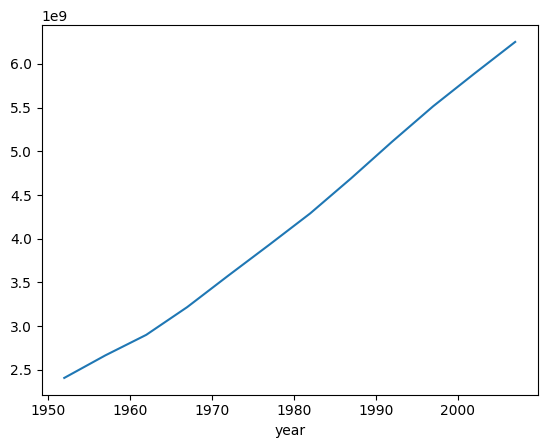

In [59]:
# Opción 1
# Usamos la función plot de series de pandas
pobAnual.plot()

<Axes: xlabel='year'>

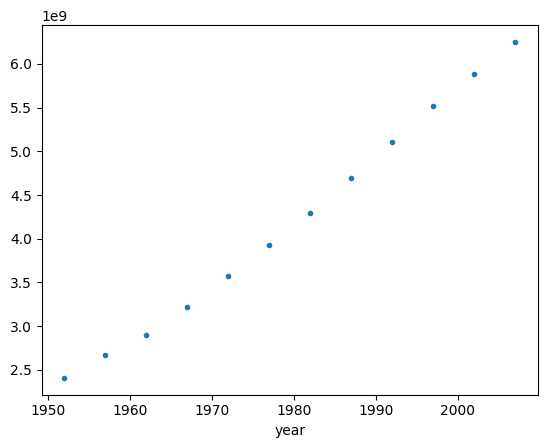

In [60]:
# O podemos graficar solo puntos
pobAnual.plot(style = ".")

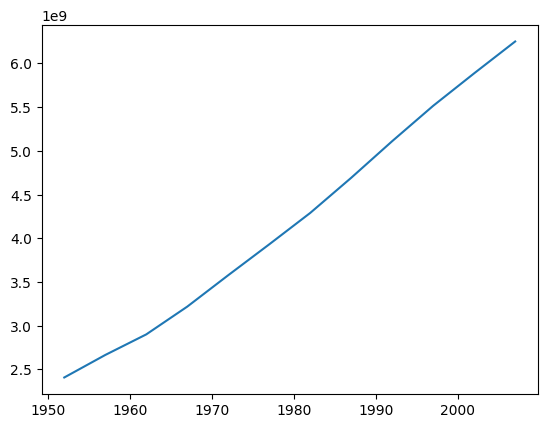

In [61]:
# Opcion 3
# Asignamos los valores a variables (arrays de numpy) y graficamos las variables
x = pobAnual.index
y = pobAnual.values
plt.plot(x,y)

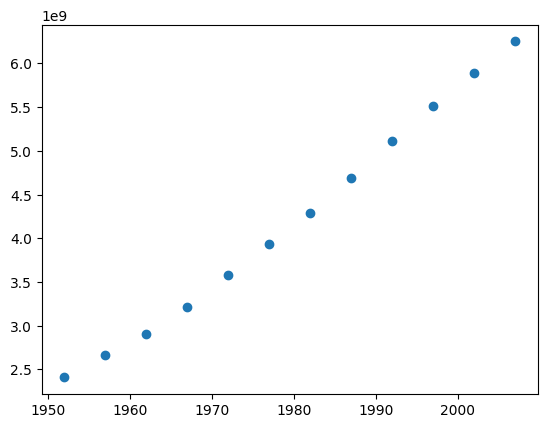

In [62]:
# Opcion 4
# Matplotlib tiene una función scatter para graficar puntos
plt.scatter(x,y)

In [63]:
# Vamos a analizar los datos de 2007
datos2007 = gapminder[gapminder["year"]==2007]

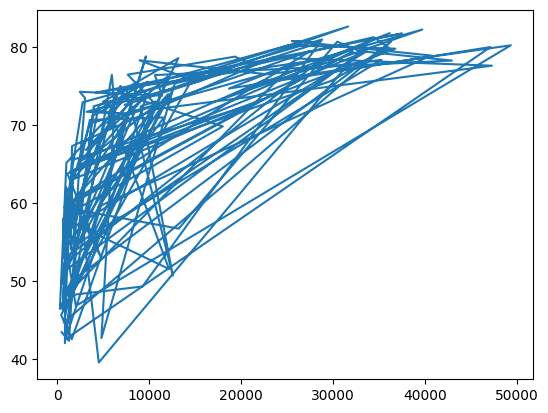

In [64]:
# Queremos ver si hay relación entre el producto bruto y la expectativa de vida
plt.plot(datos2007.gdpPercap, datos2007.lifeExp)

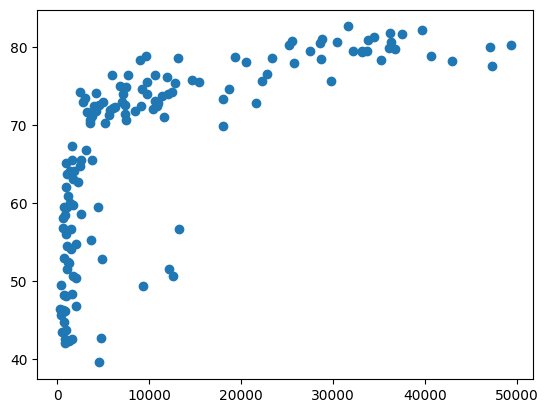

In [65]:
# Ay no, eso no, hacemos un "scatter plot"
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.show()

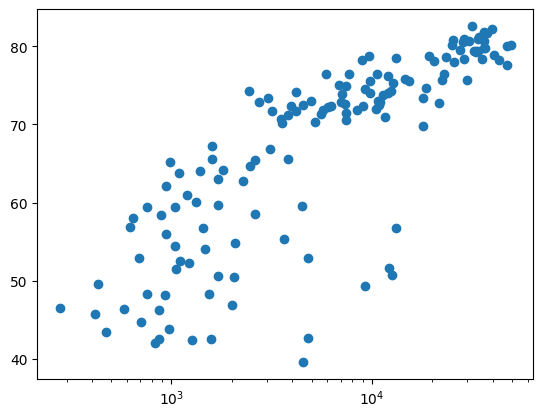

In [66]:
# Se ve mejor la correlación si usamos escala logaritmica en el eje X
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')

Vamos a mejorar un poco el gráfico

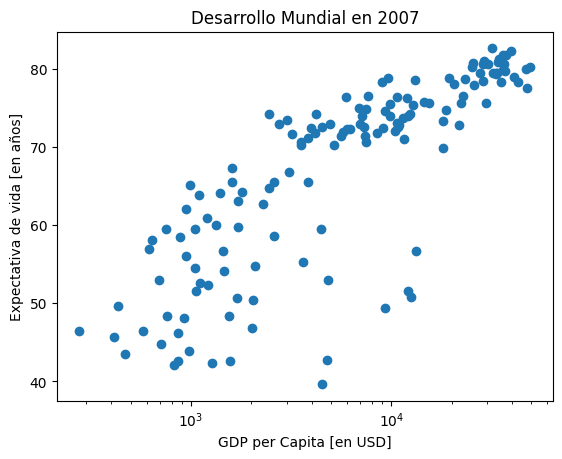

In [67]:
# Agregamos etiquetas al gráfico y a los ejes
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.show()

Reemplacemos las marcas en el eje $x$ 10³, 10⁴, 10⁵ con 1k, 10k y 100k. 

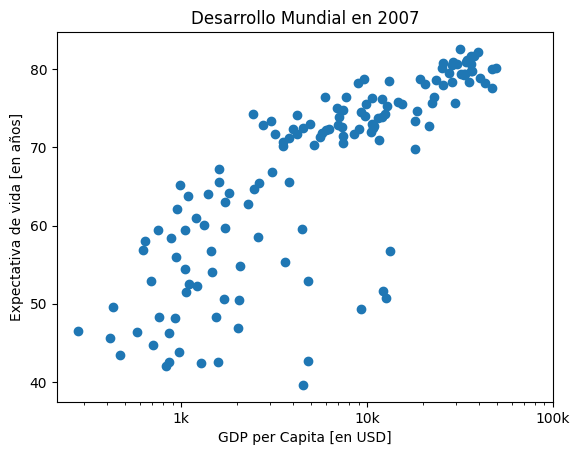

In [68]:
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

Seaborn es una biblioteca para visualización de datos en Python, basada en Matplotlib que agrega muchas funcioanlidades.

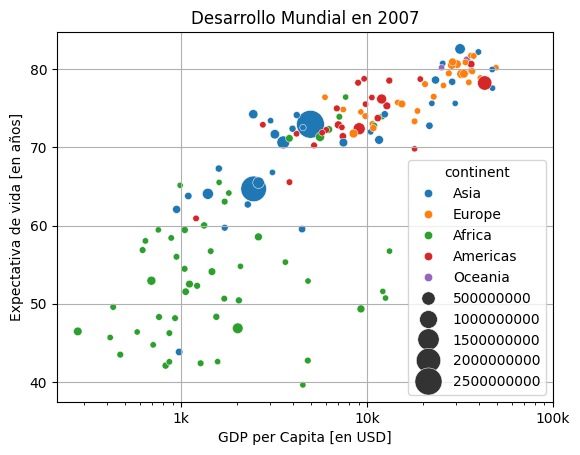

In [69]:
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico

# Almacenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])

sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop*2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

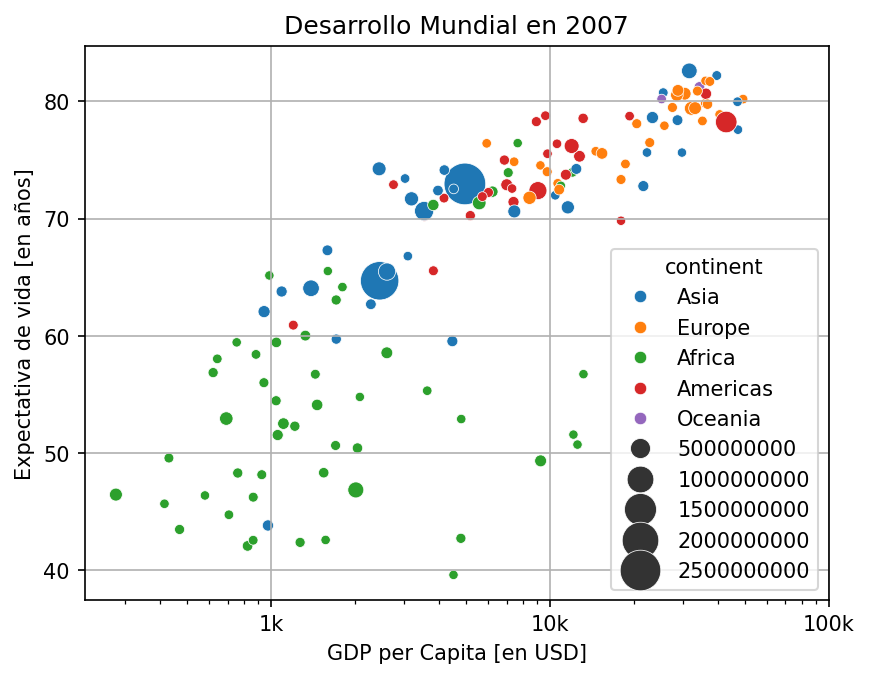

In [70]:
# Aumenta el tamaño del gráfico
plt.figure(dpi=150)

# Alcenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])
np_pop2 = np_pop*2
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico
sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

## Archivos de datos

La biblioteca Pandas nos permite trabajar fácilmente con archivos de datos.
1. Leer el archivo casos_coronavirus.csv .
2. Graficar la curva de casos por día.
3. Graficar la curva de casos acumulados.
4. Definir log_cum_casos como el logaritmo de la cantidad de casos acumulados y graficar en función de la cantidad de días transcurridos.

Utilicen o modifiquen el siguiente código.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("casos_coronavirus.csv")
df.head()  # Primeras filas del DataFrame

,fecha,confirmados_Nuevos
0,3-3-2020,1
1,4-3-2020,0
2,5-3-2020,1
3,6-3-2020,6
4,7-3-2020,0


In [93]:
# ¿Cómo usamos la fecha como índice?
#Forma1
df.set_index("fecha")

,confirmados_Nuevos
fecha,
3-3-2020,1
4-3-2020,0
5-3-2020,1
6-3-2020,6
7-3-2020,0
...,...
2-6-2020,904
3-6-2020,949
4-6-2020,929


In [94]:
# Información básica del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fecha               96 non-null     object
 1   confirmados_Nuevos  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


<Axes: >

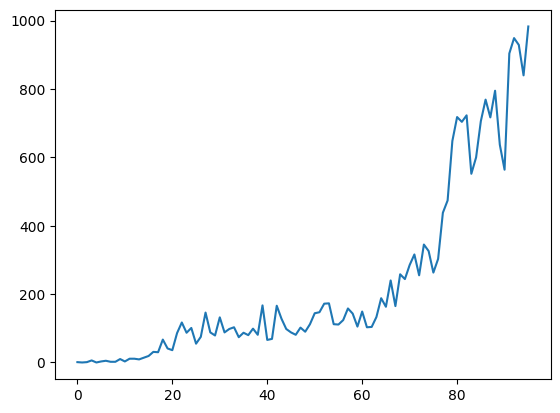

In [95]:
df["confirmados_Nuevos"].plot()

Podemos calcular la cantidad de casos acumulados.

<Axes: >

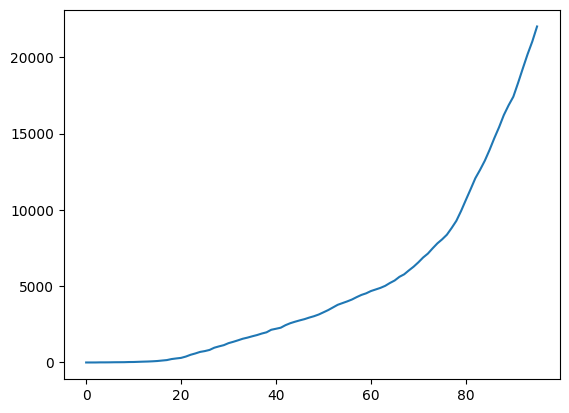

In [96]:
casos_acumulados = df["confirmados_Nuevos"].cumsum()
casos_acumulados.plot()

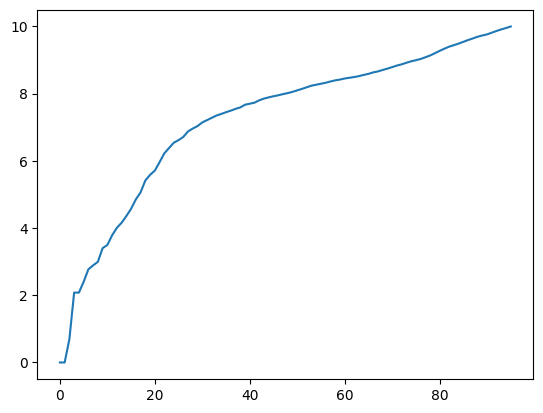

In [97]:
# Ejercicio: graficar el logaritmo de los casos acumulados
log = np.log(casos_acumulados).plot()

## Estadística descriptiva

In [98]:
# Vamos a analizar los datos de 2007
datos2007 = gapminder[gapminder["year"]==2007]

# Queremos usar los países como índices
datos2007 = datos2007.set_index("country")

In [99]:
# Funcionó?
datos2007 

,continent,year,lifeExp,pop,gdpPercap
country,,,,,
Afghanistan,Asia,2007,43.828,31889923,974.580338
Albania,Europe,2007,76.423,3600523,5937.029526
Algeria,Africa,2007,72.301,33333216,6223.367465
Angola,Africa,2007,42.731,12420476,4797.231267
Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...
Vietnam,Asia,2007,74.249,85262356,2441.576404
West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906


Mirando los datos de 2007, ¿cuál es el país con mayor expectativa de vida? ¿Cuál es el país con menor expectativa de vida?

In [100]:
datos2007["lifeExp"].max()

np.float64(82.603)

En matematica, cuando queremos saber paa que valor se alcanza el maximo, estamos buscando el argumento del maximo; la func es argmax

In [101]:
datos2007["lifeExp"].argmax()

np.int64(66)

In [109]:
datos2007["lifeExp"].idxmax()

'Japan'

### Medidas de tendencia central

Para el año 2007, calcular el valor medio y la mediana de las variables gdpPercap y lifeExp entre todos los países.
Son similares o distintas? A qué lo atribuyen? Consideran que alguna resume mejor la realidad que la otra?


In [103]:
datos2007["lifeExp"].median()

np.float64(71.93549999999999)

In [104]:
datos2007["lifeExp"].mean()

np.float64(67.00742253521126)

In [105]:
datos2007["gdpPercap"].median()

np.float64(6124.3711084999995)

In [106]:
datos2007["gdpPercap"].mean()

np.float64(11680.071819878167)

¿Es lo mismo el promedio de la expectativa de vida entre todos los países y el promedio de la expectativa de vida entre todas las personas?
¿Cuál calculamos arriba? ¿Cómo podemos calcular el otro?


### Medidas de dispersión

Para el año 2007, calcular la varianza y el desvío estándar de las variables gdpPercap y lifeExp entre todos los países.

In [107]:
datos2007["lifeExp"].var()

np.float64(145.7578240471481)

In [108]:
datos2007["lifeExp"].std()

np.float64(12.07302050222512)